<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/HoltWinterSimple%26DoubleExpSmoothing_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/EnergyProduction.csv", index_col='DATE', parse_dates=True)

In [9]:
data.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [11]:
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [12]:
data.index.freq = 'MS'

In [13]:
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

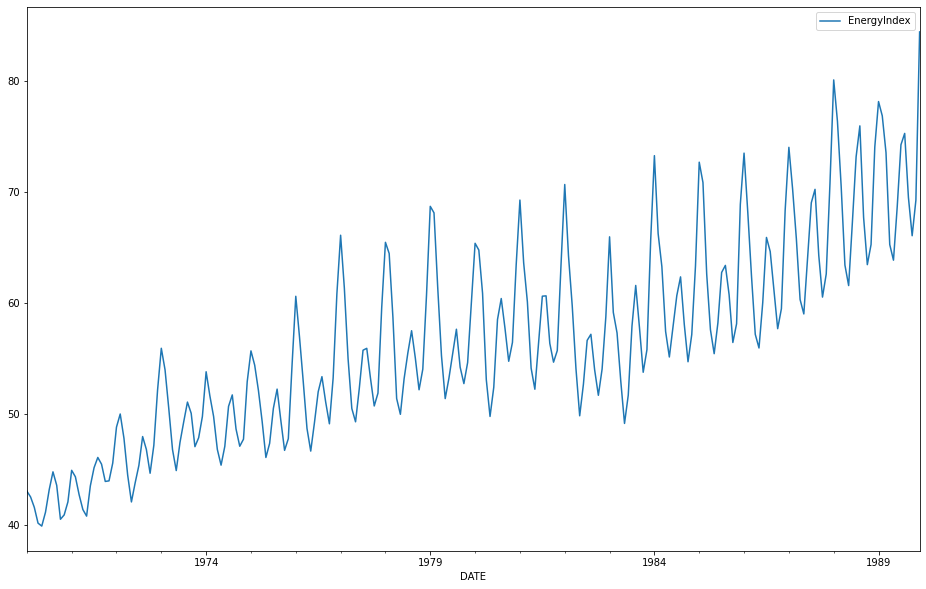

In [14]:
data.plot(figsize=(16,10))

In [17]:
# moving average 12 month
data['SMA_12'] = data['EnergyIndex'].rolling(window=12).mean()

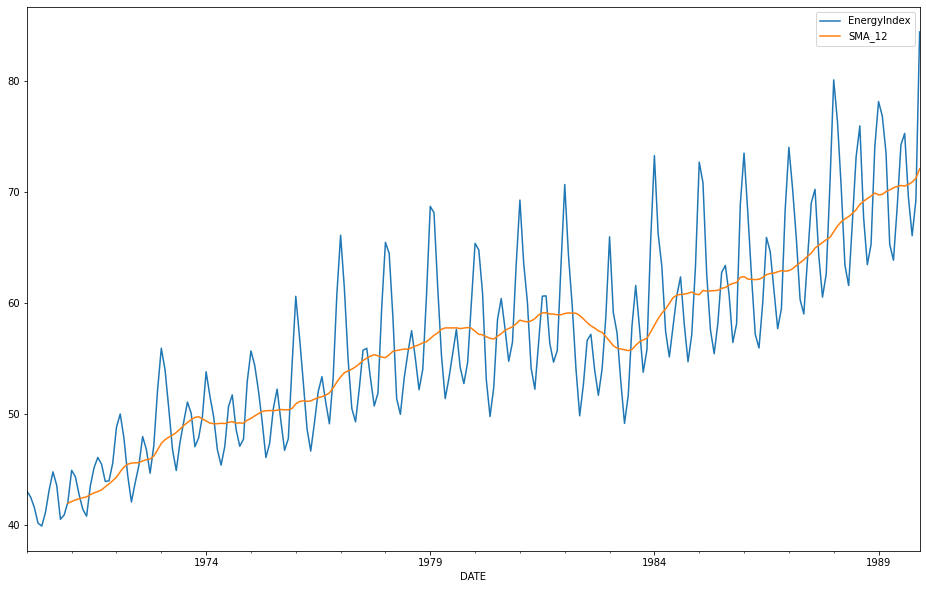

In [18]:
data.plot(figsize=(16,10))

In [25]:
#exponential moving average
data['SES_12'] = SimpleExpSmoothing(data['EnergyIndex']).fit(smoothing_level=2/(12+1), optimized=False).fittedvalues.shift(-1)

In [26]:
data.head()

,EnergyIndex,SMA_12,SES_12
DATE,,,
1970-01-01,43.0869,NaN,43.086900
1970-02-01,42.5577,NaN,43.005485
1970-03-01,41.6215,NaN,42.792564
1970-04-01,40.1982,NaN,42.393431
1970-05-01,39.9321,NaN,42.014765


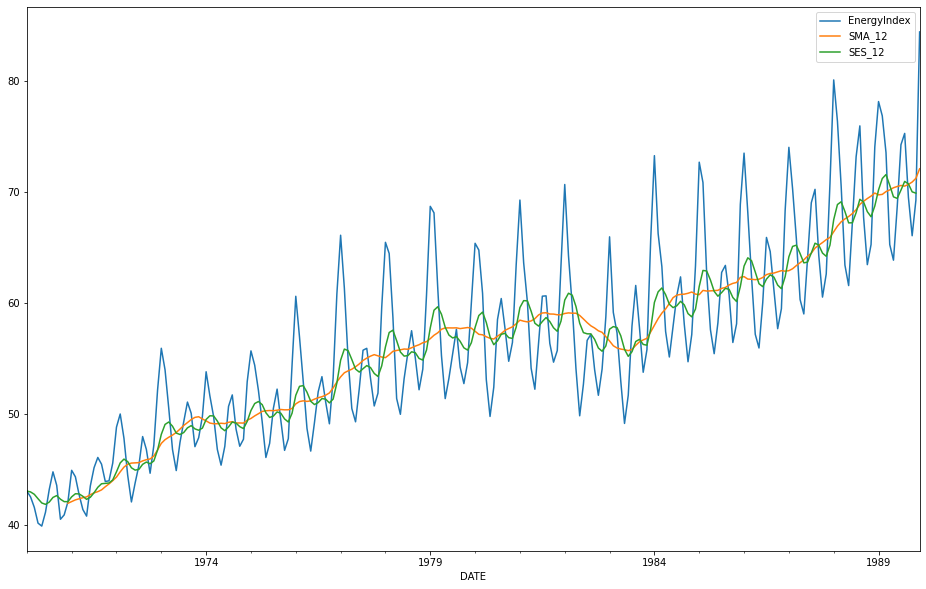

In [27]:
data.plot(figsize=(16,10))

In [28]:
#double exponential 

In [29]:
data['DES_MUL_12'] = ExponentialSmoothing(data['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12)

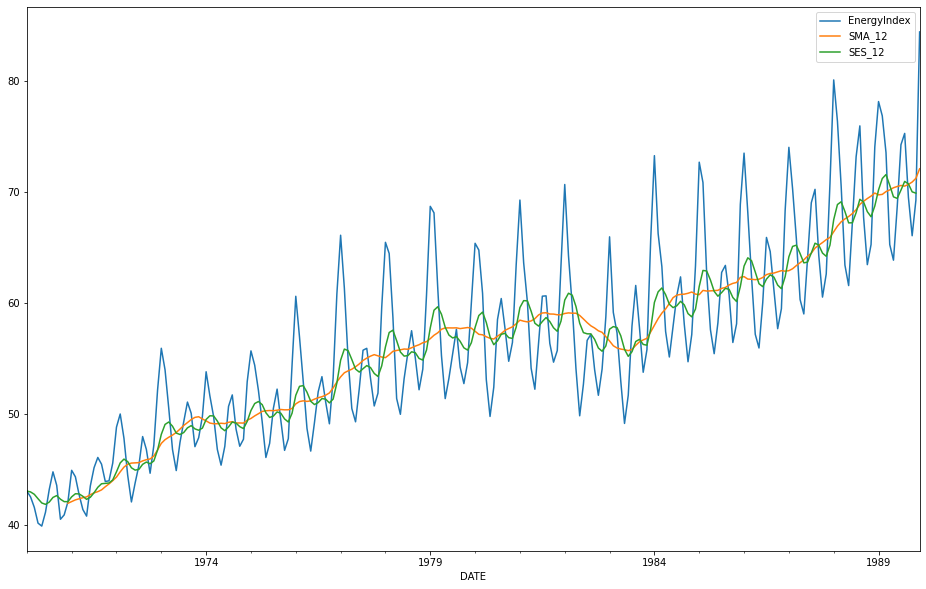

In [30]:
data.plot(figsize=(16,10))

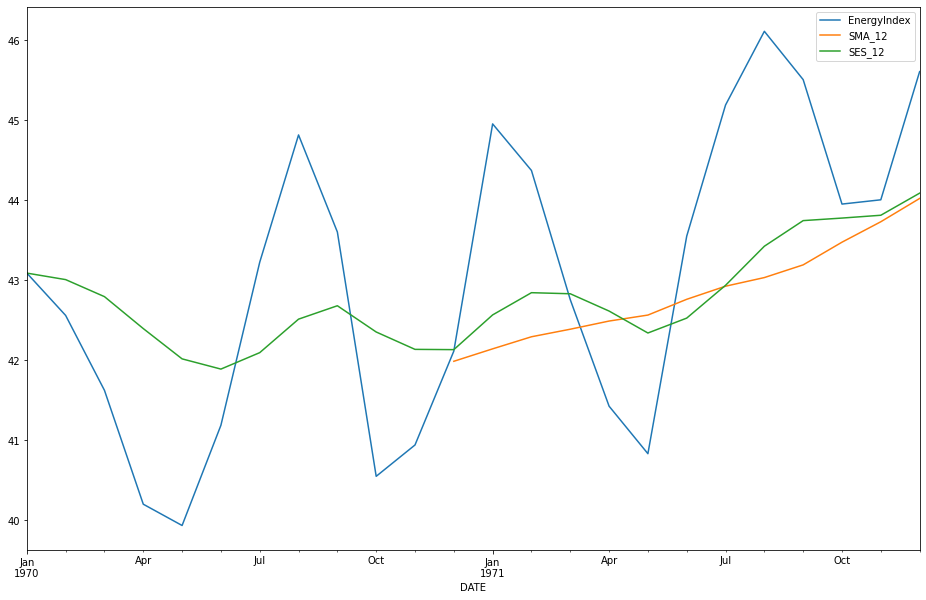

In [31]:
data[:24].plot(figsize=(16,10))